<a href="https://colab.research.google.com/github/plaban1981/Dphi_hackathon/blob/main/Datasprint_41__Fruits_Recognition_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

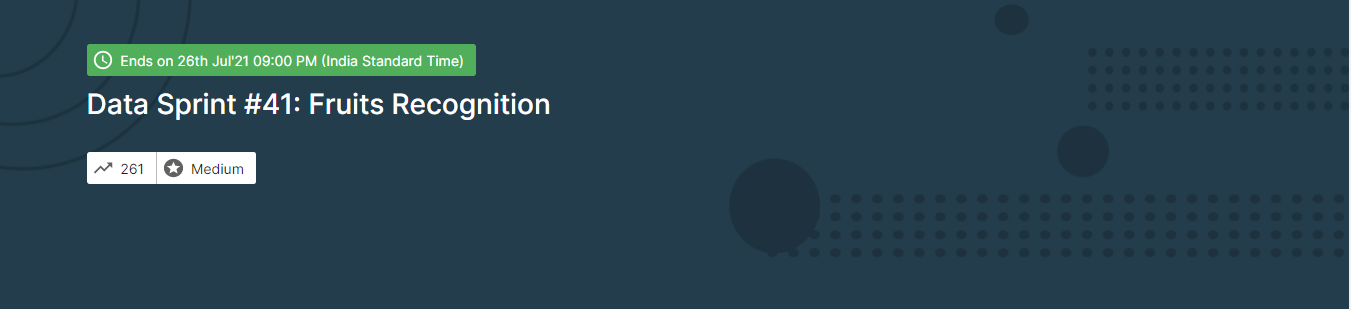

## Problem Overview
 

Deep learning has been proved to be an advanced technology for big data analysis with a large number of successful cases in image processing, speech recognition, object detection, and so on. It has also been introduced in food science and engineering, and agriculture technology. There are some research papers already published for the applications like food recognition, leaves recognition, fruits and vegetable recognition, identification of healthier food, etc.

 

We have provided you with more than 8000 images of more than 130 different types of fruits.

## Objective
 
You are required to build a machine learning or deep learning model that would recognize the name of a given fruit or vegetable.

## Data Secription

The dataset contains images of more than 130 fruits & vegetables.

The dataset can be downloaded from the given link: https://drive.google.com/file/d/101lHWlBKAsXjPkVBTz1_Ge9S2rwVPTUU/view?usp=sharing

From the above link you will be able to download a zip file named ‘fruits_data.zip’. After you extract this zip file, you will get four files:

* train - contains all the images that are to be used for training your model.

* Training_set.csv - this csv file has contains the labels for the training images

* test - contains 9000+ images. For these images you are required to make predictions

* Testing_set.csv - this is the order of the predictions for each image that is to be submitted on the platform. 

* sample_submission.csv- this is the sample submission file for the data sprint.

Make sure the predictions you submit are with their image’s filename in the same order as given in this file.



## Download Images

In [1]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='101lHWlBKAsXjPkVBTz1_Ge9S2rwVPTUU',
dest_path='content/fruits_data.zip',
unzip=True)

Unzipping...Done.


## Import Libraries

In [2]:
import pandas as pd # Data analysis and manipultion tool
import numpy as np # Fundamental package for linear algebra and multidimensional arrays
import tensorflow as tf # Deep Learning Tool
import os # OS module in Python provides a way of using operating system dependent functionality
import cv2 # Library for image processing
from sklearn.model_selection import train_test_split # For splitting the data into train and validation set

In [3]:
train = pd.read_csv("/content/content/fruits_data/Training_set.csv")
test = pd.read_csv("/content/content/fruits_data/Testing_set.csv")
sub = pd.read_csv("/content/content/fruits_data/sample submission.csv")

In [4]:
train.head()

,filename,label
0,Image_1.jpg,Pear 2
1,Image_2.jpg,Tomato Heart
2,Image_3.jpg,Plum 3
3,Image_4.jpg,Pear Stone
4,Image_5.jpg,Cherry 2


In [19]:
train.label.nunique()

131

In [24]:
len(train.label.unique().tolist())

131

In [17]:
print(train.label.value_counts())

Grape Blue       689
Plum 3           630
Peach 2          517
Cherry 2         517
Tomato 1         517
                ... 
Cucumber Ripe    275
Tomato Maroon    257
Mangostan        210
Pear Kaiser      210
Ginger Root      208
Name: label, Length: 131, dtype: int64


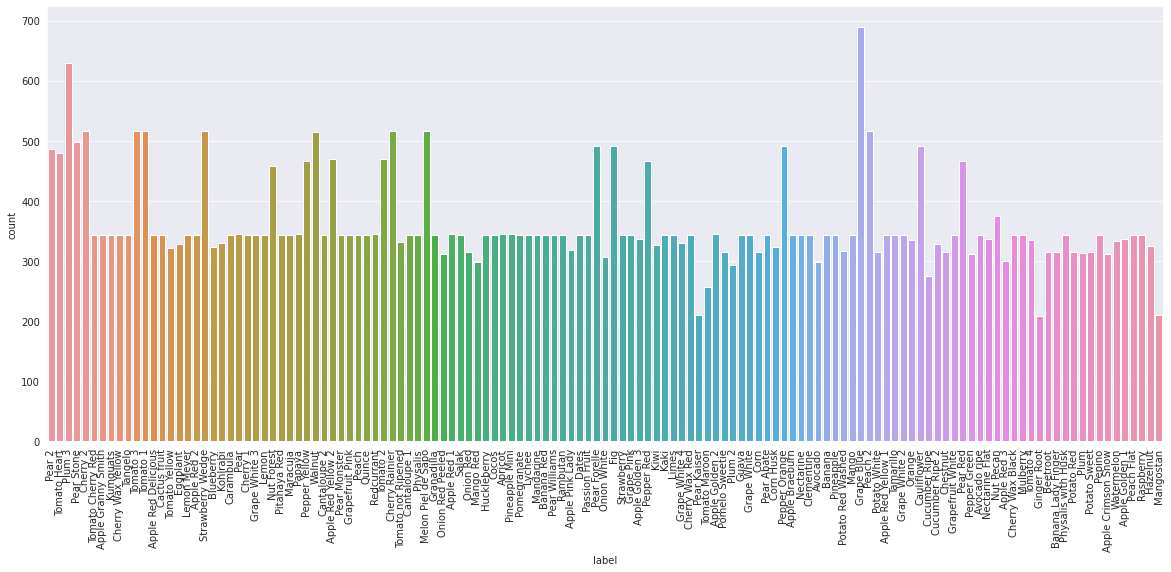

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.countplot(x='label',data =train)

## Label Visualization

In [28]:
import os
from PIL import Image
from google.colab.patches import cv2_imshow
image_list = train.filename.values.tolist()
labels = train.label.values.tolist()
image = Image.open(os.path.join("/content/content/fruits_data/train",image_list[0]))

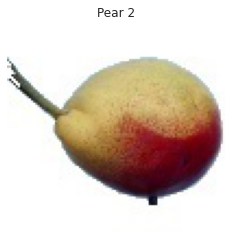

In [37]:
plt.imshow(image)
plt.title(labels[0])
plt.axis('off')
plt.show()

## Original image size

In [26]:
img = cv2.imread(os.path.join("/content/content/fruits_data/train",image_list[0]))
img.shape

(100, 100, 3)

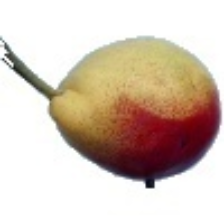

In [33]:
cv2_imshow(cv2.resize(img,(224,224)))

## Mount Drive

In [43]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Copy fruits_data to drive

In [51]:
!unzip "/content/content/fruits_data.zip" -d "/content/drive/MyDrive/dphi"


Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/dphi/fruits_data/train/Image_55.jpg  
  inflating: /content/drive/MyDrive/dphi/fruits_data/train/Image_550.jpg  
  inflating: /content/drive/MyDrive/dphi/fruits_data/train/Image_5500.jpg  
  inflating: /content/drive/MyDrive/dphi/fruits_data/train/Image_5501.jpg  
  inflating: /content/drive/MyDrive/dphi/fruits_data/train/Image_5502.jpg  
  inflating: /content/drive/MyDrive/dphi/fruits_data/train/Image_5503.jpg  
  inflating: /content/drive/MyDrive/dphi/fruits_data/train/Image_5504.jpg  
  inflating: /content/drive/MyDrive/dphi/fruits_data/train/Image_5505.jpg  
  inflating: /content/drive/MyDrive/dphi/fruits_data/train/Image_5506.jpg  
  inflating: /content/drive/MyDrive/dphi/fruits_data/train/Image_5507.jpg  
  inflating: /content/drive/MyDrive/dphi/fruits_data/train/Image_5508.jpg  
  inflating: /content/drive/MyDrive/dphi/fruits_data/train/Image_5509.jpg  
  inflating: /content/drive/MyDrive/dphi

## Import Keras library

In [39]:
from sklearn.model_selection import KFold, StratifiedKFold
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.layers import Dense, Dropout,  Conv2D, Input, Lambda, Flatten, TimeDistributed, Activation, MaxPool2D
from tensorflow.keras.layers import Add, Reshape, MaxPooling2D, Concatenate, Embedding, RepeatVector, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.regularizers import *
#
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns
sns.set_style('darkgrid')
#
import os
import shutil
import cv2
import glob
from tqdm.notebook import tqdm
from tqdm import tqdm
from PIL import Image
#
import gc
#
import warnings
warnings.filterwarnings('ignore')

## Create an instance of the ImageDataGenerator class

In [49]:
batch_size=32
image_shape=(229,229,3)
class_mode='categorical'
dir_path = '/content/content/fruits_data/train'

## Train / Validation Data Generator

In [41]:
generator = ImageDataGenerator(rescale=1./255)

## Test Data Generator

In [42]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_generator=test_datagen.flow_from_dataframe(
dataframe=test,
directory="/content/content/fruits_data/test",
x_col="filename",
y_col=None,
batch_size=1,
seed=42,
shuffle=False,
class_mode=None,
target_size=(229,229))
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

Found 20308 validated image filenames.


## Define a function  for getting model name in each of the k iterations

In [44]:
def get_model_name(k):
    return 'model_'+str(k)+'.h5'

## Define a function to claibrate F1 Scores

In [45]:
import keras.backend as K
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

## Create Model

In [55]:
def create_model():
  model = Sequential()

  conv_base = tf.keras.applications.DenseNet121(input_shape=(229,229,3), include_top=False, pooling='max',weights='imagenet')
  model.add(conv_base)
  model.add(BatchNormalization())
  model.add(Dense(2048, activation='relu', kernel_regularizer=l1_l2(0.01)))
  model.add(BatchNormalization())
  model.add(Dense(131, activation='softmax'))

  train_layers = [layer for layer in conv_base.layers[::-1][:5]]

  for layer in conv_base.layers:
    if layer in train_layers:
      layer.trainable = True
  return model

In [56]:
create_model().summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 1024)              7037504   
_________________________________________________________________
batch_normalization_4 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_4 (Dense)              (None, 2048)              2099200   
_________________________________________________________________
batch_normalization_5 (Batch (None, 2048)              8192      
_________________________________________________________________
dense_5 (Dense)              (None, 131)               268419    
Total params: 9,417,411
Trainable params: 9,327,619
Non-trainable params: 89,792
_________________________________________________________________


## Getting the folds and creating the data generators

In [58]:
from keras.models import load_model

Found 37907 validated image filenames belonging to 131 classes.
Found 9477 validated image filenames belonging to 131 classes.
Epoch 1/10
1184/1184 [==============================] - 286s 231ms/step - loss: 18.4564 - accuracy: 0.7961 - get_f1: 0.7624 - val_loss: 4.0429 - val_accuracy: 0.9960 - val_get_f1: 0.9751

Epoch 00001: val_loss improved from inf to 4.04287, saving model to /content/drive/MyDrive/dphi/fruits_data/saved_model/model_2.h5
Epoch 2/10
1184/1184 [==============================] - 272s 229ms/step - loss: 3.6126 - accuracy: 0.9948 - get_f1: 0.9783 - val_loss: 3.4414 - val_accuracy: 0.9999 - val_get_f1: 0.9895

Epoch 00002: val_loss improved from 4.04287 to 3.44144, saving model to /content/drive/MyDrive/dphi/fruits_data/saved_model/model_2.h5
Epoch 3/10
1184/1184 [==============================] - 273s 230ms/step - loss: 3.3182 - accuracy: 0.9969 - get_f1: 0.9870 - val_loss: 3.0818 - val_accuracy: 0.9976 - val_get_f1: 0.9829

Epoch 00003: val_loss improved from 3.44144 t

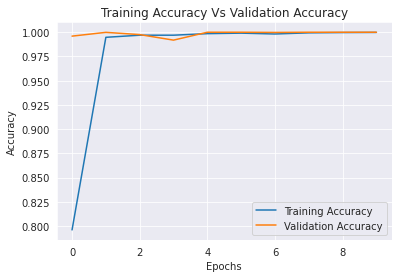

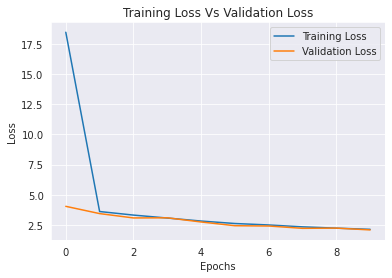

20308/20308 [==============================] - 566s 28ms/step
Found 37907 validated image filenames belonging to 131 classes.
Found 9477 validated image filenames belonging to 131 classes.
Epoch 1/10
1184/1184 [==============================] - 288s 232ms/step - loss: 18.2393 - accuracy: 0.8039 - get_f1: 0.7704 - val_loss: 4.0003 - val_accuracy: 0.9881 - val_get_f1: 0.9568

Epoch 00001: val_loss improved from inf to 4.00034, saving model to /content/drive/MyDrive/dphi/fruits_data/saved_model/model_3.h5
Epoch 2/10
1184/1184 [==============================] - 273s 230ms/step - loss: 3.6221 - accuracy: 0.9951 - get_f1: 0.9778 - val_loss: 3.3712 - val_accuracy: 0.9964 - val_get_f1: 0.9863

Epoch 00002: val_loss improved from 4.00034 to 3.37122, saving model to /content/drive/MyDrive/dphi/fruits_data/saved_model/model_3.h5
Epoch 3/10
1184/1184 [==============================] - 273s 231ms/step - loss: 3.2873 - accuracy: 0.9971 - get_f1: 0.9875 - val_loss: 3.2343 - val_accuracy: 1.0000 - val

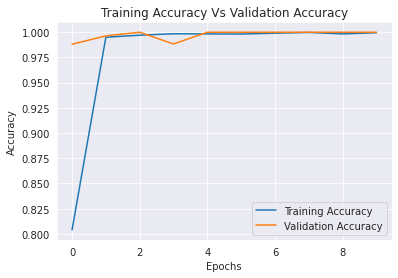

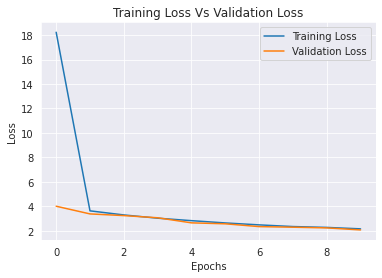

20308/20308 [==============================] - 585s 29ms/step
Found 37907 validated image filenames belonging to 131 classes.
Found 9477 validated image filenames belonging to 131 classes.
Epoch 1/10
1184/1184 [==============================] - 288s 232ms/step - loss: 18.2331 - accuracy: 0.8039 - get_f1: 0.7698 - val_loss: 3.6873 - val_accuracy: 0.9990 - val_get_f1: 0.9837

Epoch 00001: val_loss improved from inf to 3.68727, saving model to /content/drive/MyDrive/dphi/fruits_data/saved_model/model_4.h5
Epoch 2/10
1184/1184 [==============================] - 273s 230ms/step - loss: 3.6062 - accuracy: 0.9955 - get_f1: 0.9787 - val_loss: 3.3276 - val_accuracy: 0.9998 - val_get_f1: 0.9903

Epoch 00002: val_loss improved from 3.68727 to 3.32758, saving model to /content/drive/MyDrive/dphi/fruits_data/saved_model/model_4.h5
Epoch 3/10
1184/1184 [==============================] - 272s 230ms/step - loss: 3.2673 - accuracy: 0.9976 - get_f1: 0.9881 - val_loss: 3.2549 - val_accuracy: 0.9980 - val

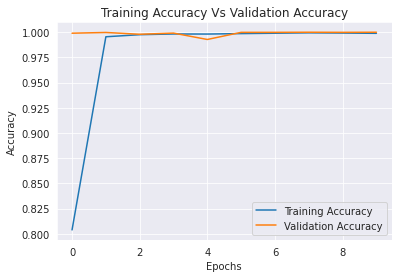

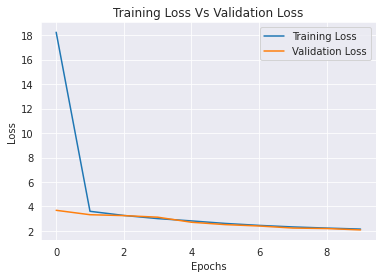

20308/20308 [==============================] - 594s 29ms/step
Found 37907 validated image filenames belonging to 131 classes.
Found 9477 validated image filenames belonging to 131 classes.
Epoch 1/10
1184/1184 [==============================] - 288s 232ms/step - loss: 18.2229 - accuracy: 0.8031 - get_f1: 0.7714 - val_loss: 3.9004 - val_accuracy: 0.9900 - val_get_f1: 0.9702

Epoch 00001: val_loss improved from inf to 3.90043, saving model to /content/drive/MyDrive/dphi/fruits_data/saved_model/model_5.h5
Epoch 2/10
1184/1184 [==============================] - 272s 229ms/step - loss: 3.6668 - accuracy: 0.9950 - get_f1: 0.9778 - val_loss: 3.4475 - val_accuracy: 0.9927 - val_get_f1: 0.9907

Epoch 00002: val_loss improved from 3.90043 to 3.44747, saving model to /content/drive/MyDrive/dphi/fruits_data/saved_model/model_5.h5
Epoch 3/10
1184/1184 [==============================] - 272s 230ms/step - loss: 3.3573 - accuracy: 0.9967 - get_f1: 0.9858 - val_loss: 3.2524 - val_accuracy: 0.9990 - val

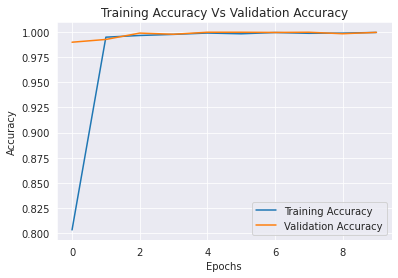

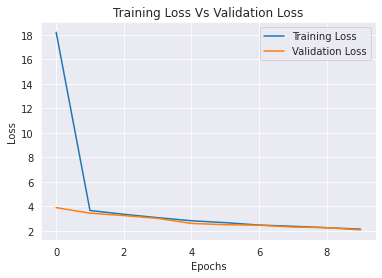

20308/20308 [==============================] - 615s 30ms/step
Found 37908 validated image filenames belonging to 131 classes.
Found 9476 validated image filenames belonging to 131 classes.
Epoch 1/10
1184/1184 [==============================] - 290s 234ms/step - loss: 18.2350 - accuracy: 0.8027 - get_f1: 0.7694 - val_loss: 4.2437 - val_accuracy: 0.9748 - val_get_f1: 0.9403

Epoch 00001: val_loss improved from inf to 4.24369, saving model to /content/drive/MyDrive/dphi/fruits_data/saved_model/model_6.h5
Epoch 2/10
1184/1184 [==============================] - 274s 232ms/step - loss: 3.6082 - accuracy: 0.9947 - get_f1: 0.9787 - val_loss: 3.3409 - val_accuracy: 0.9895 - val_get_f1: 0.9743

Epoch 00002: val_loss improved from 4.24369 to 3.34086, saving model to /content/drive/MyDrive/dphi/fruits_data/saved_model/model_6.h5
Epoch 3/10
1184/1184 [==============================] - 273s 230ms/step - loss: 3.3028 - accuracy: 0.9969 - get_f1: 0.9871 - val_loss: 3.1755 - val_accuracy: 0.9983 - val

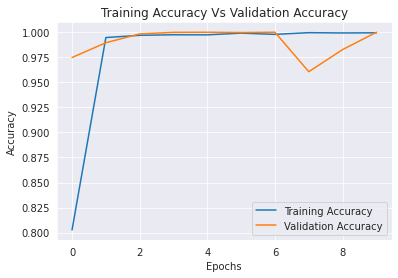

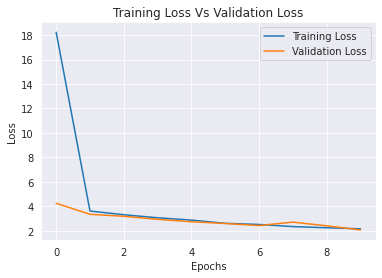

20308/20308 [==============================] - 560s 27ms/step


In [62]:
VALIDATION_ACCURACY = []
VALIDAITON_LOSS = []
all_preds = []
dropout=.3
lr=.001
num_epochs = 15
save_dir = '/content/drive/MyDrive/dphi/fruits_data/saved_model/'
fold_var = 2
n_class = 14
skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)
#
for train_index, val_index in skf.split(train,train.label):
	training_data = train.iloc[train_index]
	validation_data = train.iloc[val_index]
	
	train_data_generator = generator.flow_from_dataframe(training_data, 
                                                      directory = dir_path,
			 	 	 	                                          x_col = "filename", 
                                                      y_col = "label",
						                                          class_mode = class_mode, 
                                                      batch_size = 32,
                                                      seed = 42,
                                                      shuffle = True,
                                                      target_size=(229,229))
	valid_data_generator  = generator.flow_from_dataframe(validation_data, 
                                                       directory = dir_path,
							                                          x_col = "filename", 
                                                        y_col = "label",
						                                            class_mode = class_mode, 
                                                        batch_size = 32,
                                                        seed = 42,
                                                        shuffle = True,
                                                        target_size=(229,229))
	
	# CREATE NEW MODEL
	model = create_model()
	# COMPILE NEW MODEL
	model.compile(optimizer =tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                  metrics=["accuracy",get_f1],
                  loss= tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1))
	# CREATE CALLBACKS
	
	my_callbacks = [
               tf.keras.callbacks.ModelCheckpoint(save_dir+get_model_name(fold_var), monitor = 'val_loss',verbose = 1,save_weights_only=False, save_best_only = True),
              EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='min'),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='min',min_delta=1e-4)
	]

	# There can be other callbacks, but just showing one because it involves the model name
	# This saves the best model
	# FIT THE MODEL
	STEP_SIZE_TRAIN = train_data_generator.n//train_data_generator.batch_size
	STEP_SIZE_VALID = valid_data_generator.n//valid_data_generator.batch_size
	history = model.fit(
        train_data_generator,
        steps_per_epoch= STEP_SIZE_TRAIN,
        epochs=10,
        validation_data=valid_data_generator,
        validation_steps= STEP_SIZE_VALID,
        callbacks=[my_callbacks], 
        )
	#PLOT HISTORY
	#		:
	plt.plot(history.history['accuracy'],label='Training Accuracy')
	plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
	plt.xlabel('Epochs')
	plt.ylabel('Accuracy')
	plt.title('Training Accuracy Vs Validation Accuracy')
	plt.legend()
	plt.show()
  #
	plt.plot(history.history['loss'],label='Training Loss')
	plt.plot(history.history['val_loss'],label='Validation Loss')
	plt.xlabel('Epochs')
	plt.ylabel('Loss')
	plt.title('Training Loss Vs Validation Loss')
	plt.legend()
	plt.show()
	#		:
	
	# LOAD BEST MODEL to evaluate the performance of the model
	model.load_weights("/content/drive/MyDrive/dphi/fruits_data/saved_model/model_"+str(fold_var)+".h5")
	#model = load_model("/content/drive/MyDrive/dphi/fruits_data/saved_model/model_"+str(fold_var)+".h5")
	results = model.evaluate(valid_data_generator)
	results = dict(zip(model.metrics_names,results))
	
	VALIDATION_ACCURACY.append(results['accuracy'])
	VALIDAITON_LOSS.append(results['loss'])
	preds = model.predict(test_generator,steps=STEP_SIZE_TEST,verbose=1)
	all_preds.append(preds)
	#
	tf.keras.backend.clear_session()
	gc.collect()
	fold_var += 1


## Final Predictions

In [63]:
final_pred = (all_preds[0] + all_preds[1] + all_preds[2] + all_preds[3] + all_preds[4])/5

In [64]:
predictions = np.argmax(final_pred,axis=1)

## Predictions mapper

In [65]:
prediction_mapper = { v: k for k,v in valid_data_generator.class_indices.items()}
prediction_mapper

{0: 'Apple Braeburn',
 1: 'Apple Crimson Snow',
 2: 'Apple Golden 1',
 3: 'Apple Golden 2',
 4: 'Apple Golden 3',
 5: 'Apple Granny Smith',
 6: 'Apple Pink Lady',
 7: 'Apple Red 1',
 8: 'Apple Red 2',
 9: 'Apple Red 3',
 10: 'Apple Red Delicious',
 11: 'Apple Red Yellow 1',
 12: 'Apple Red Yellow 2',
 13: 'Apricot',
 14: 'Avocado',
 15: 'Avocado ripe',
 16: 'Banana',
 17: 'Banana Lady Finger',
 18: 'Banana Red',
 19: 'Beetroot',
 20: 'Blueberry',
 21: 'Cactus fruit',
 22: 'Cantaloupe 1',
 23: 'Cantaloupe 2',
 24: 'Carambula',
 25: 'Cauliflower',
 26: 'Cherry 1',
 27: 'Cherry 2',
 28: 'Cherry Rainier',
 29: 'Cherry Wax Black',
 30: 'Cherry Wax Red',
 31: 'Cherry Wax Yellow',
 32: 'Chestnut',
 33: 'Clementine',
 34: 'Cocos',
 35: 'Corn',
 36: 'Corn Husk',
 37: 'Cucumber Ripe',
 38: 'Cucumber Ripe 2',
 39: 'Dates',
 40: 'Eggplant',
 41: 'Fig',
 42: 'Ginger Root',
 43: 'Granadilla',
 44: 'Grape Blue',
 45: 'Grape Pink',
 46: 'Grape White',
 47: 'Grape White 2',
 48: 'Grape White 3',
 49: '

In [66]:
test['label'] = predictions
test['label'] = test['label'].map(prediction_mapper)

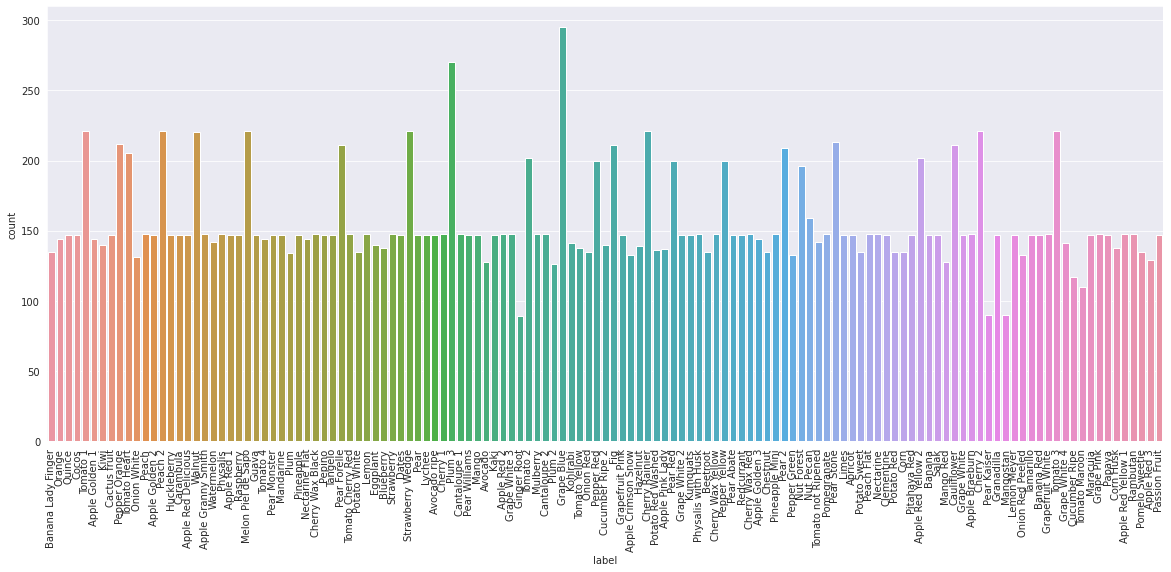

In [68]:
sns.set_style('darkgrid')
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.countplot(x='label',data=test)
plt.show()

In [102]:
test.head()

,filename,label
0,Image_1.jpg,Banana Lady Finger
1,Image_2.jpg,Orange
2,Image_3.jpg,Quince
3,Image_4.jpg,Cocos
4,Image_5.jpg,Tomato 1


In [69]:
sub.head()

,label
0,Banana Lady Finger
1,Banana Lady Finger
2,Banana Lady Finger
3,Banana Lady Finger
4,Banana Lady Finger


In [70]:
test[['label']].to_csv("densenet121_fruits_keras_cv.csv",index=False)

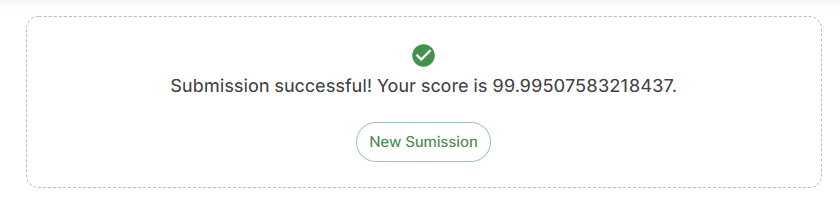

## Trying out Predictions 

In [156]:
! pip install gradio

     |████████████████████████████████| 2.4 MB 8.0 MB/s 
     |████████████████████████████████| 1.9 MB 41.7 MB/s 
     |████████████████████████████████| 206 kB 43.9 MB/s 
     |████████████████████████████████| 961 kB 38.8 MB/s 
     |████████████████████████████████| 3.2 MB 44.7 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4709 sha256=6f900ba43bdfeed74a883b42062c498d3ceb8d1865da77d6dc50d7e885e55613
  Stored in directory: /root/.cache/pip/wheels/13/e4/6c/e8059816e86796a597c6e6b0d4c880630f51a1fcfa0befd5e6
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-py3-none-any.whl size=3372 sha256=280e745fa4ba79d82f0303aafa615aa3605140d0113477be798e12c07293b581
  Stored in directory: /root/.cache/pip/wheels/28/c0/c4/44687421dab41455be93112bd1b0dee1f3c5a9aa27bee63708
Successfully built ffmpy flask-cachebuster


In [143]:
!wget "https://www.onlyfoods.net/wp-content/uploads/2012/05/Yellow-Pepper.jpg"

--2021-07-23 19:09:06--  https://www.onlyfoods.net/wp-content/uploads/2012/05/Yellow-Pepper.jpg
Resolving www.onlyfoods.net (www.onlyfoods.net)... 204.197.245.130
Connecting to www.onlyfoods.net (www.onlyfoods.net)|204.197.245.130|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 187631 (183K) [image/jpeg]
Saving to: ‘Yellow-Pepper.jpg’

Yellow-Pepper.jpg   100%[===================>] 183.23K   896KB/s    in 0.2s    

2021-07-23 19:09:07 (896 KB/s) - ‘Yellow-Pepper.jpg’ saved [187631/187631]



## Define the prediction pipeline

In [161]:
import cv2
import gradio as gr

In [164]:
label_list = train.label.unique().tolist()

In [180]:
def main():
  model = create_model()
     
   
  image=gr.inputs.Image(shape=(229,229))
  label=gr.outputs.Label(num_top_classes=131)
  
  class_name =  label_list
  
  def predict_img(img):
    #img=preprocess(img)
    img=img/255.0
    im=img.reshape(-1,229,229,3)
    
    model.load_weights("/content/drive/MyDrive/dphi/fruits_data/saved_model/model_2.h5")
    pred1=model.predict(im)[0]
    model.load_weights("/content/drive/MyDrive/dphi/fruits_data/saved_model/model_3.h5")
    pred2=model.predict(im)[0]
    model.load_weights("/content/drive/MyDrive/dphi/fruits_data/saved_model/model_4.h5")
    pred3=model.predict(im)[0]
    model.load_weights("/content/drive/MyDrive/dphi/fruits_data/saved_model/model_5.h5")
    pred4=model.predict(im)[0]
    model.load_weights("/content/drive/MyDrive/dphi/fruits_data/saved_model/model_6.h5")
    pred5=model.predict(im)[0]
    pred = ( pred1 + pred2 + pred3 + pred4 + pred5) /5
    predictions = np.argmax(pred)
    labels = class_name[predictions]

    return {'Predicted label':labels}
  
  gr.Interface(fn=predict_img,inputs=image,outputs="text",capture_session=True).launch(debug='True',share=True)
  
if __name__=='__main__':
    main()
  

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://47905.gradio.app
Interface loading below...


KeyboardInterrupt: ignored

In [144]:
image ="/content/Yellow-Pepper.jpg"

(793, 1024, 3)


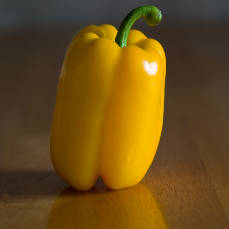

In [145]:
img = cv2.imread(image)
print(img.shape)
img = cv2.resize(img,(229,229))
cv2_imshow(img)

In [ ]:
import keras

In [159]:
model= load_model("/content/drive/MyDrive/dphi/fruits_data/saved_model/model_2.h5")


ValueError: ignored

In [152]:
model.load_weights("/content/drive/MyDrive/dphi/fruits_data/saved_model/model_2.h5")


In [153]:
im=img.reshape(1,229,229,3)

In [154]:
new_pred1 = model.predict(im)

In [149]:
new_pred5 = model.predict(im)

In [155]:
np.argmax(new_pred1),np.argmax(new_pred2),np.argmax(new_pred5)

(119, 87, 124)

In [110]:
prds = pred1=model1.predict(im)[0]

In [112]:
np.argmax(prds)

87